In [1]:
pip install --pre fecon236

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 1.8 MB/s 


In [2]:
from fecon236 import *

In [5]:
import fecon236 as fe

In [3]:
#  PREAMBLE-p10.18.0714 :: Settings, https://git.io/236pa
from __future__ import absolute_import, print_function, division
fe.system.specs()
%load_ext autoreload
%autoreload 2
#       Use 0 to disable autoreload when a module is modified.
#  NOTEBOOK DISPLAY OPTIONS...
fe.pd.set_option('display.notebook_repr_html', False)
#       Represent pandas DataFrames as text; not HTML representation.
from IPython.display import HTML  # Useful for snippets from web.
#  e.g. HTML('
#            width=700 height=350>')
from IPython.display import Image
#  e.g. Image(filename='holt-winters-equations.png', embed=True)
#                  url= Also works instead of filename.
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True",
#  which will display results in secondary notebook pager frame in a cell.
%matplotlib inline
#  Generate PLOTS inside notebook, "inline" generates static png,
#  whereas "notebook" argument allows interactive zoom and resize.

In [6]:
#  Freddie Mac series is updated weekly on Thursdays,
#  so we shall apply daily interpolation to be
#  frequency compatible with the Treasury series:
fmac = fe.daily(fe.get('MORTGAGE15US'))

In [7]:
fmac

,Y
T,
1991-08-30,8.770
1991-09-02,8.774
1991-09-03,8.778
1991-09-04,8.782
1991-09-05,8.786
...,...
2022-11-17,5.980
2022-11-18,5.960
2022-11-21,5.940


In [8]:
#  Retrieve daily rates for 10-year Treasuries...
ty = fe.get(fe.d4bond10)

#  ... then compute the MORTGAGE CREDIT SPREAD:
mort = fe.todf(fmac - ty)

In [9]:
#  We note mort extends back to 1991-08-30:
start = '1991-08-30'

In [10]:
#  The underlying data has DAILY frequency,
#  but for visualization purposes we shall
#  PLOT on MONTHLY frequency which produces
#  clear lines over several decades 
#  (otherwise, the lines will smear over finer intervals.)

def plotmonth(dfy, start=start):
    fe.plot(fe.monthly(dfy[start:]))

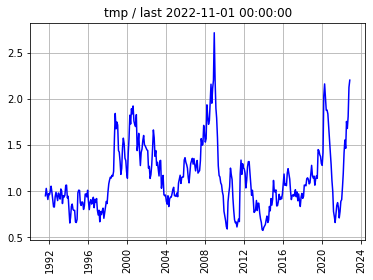

In [11]:
#  The y-scale is in (basis points)/100
plotmonth(mort)

In [12]:
fe.mad??

In [13]:
#  Profile the mortgage credit spread:
mortmad = fe.madmen(mort)

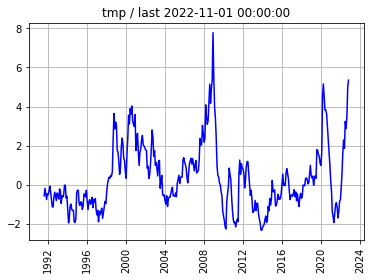

In [14]:
#  Here the y-scale uses MAD:
plotmonth(mortmad)

In [15]:
#  FRED publishes this CORPORATE CREDIT SPREAD daily:
baa = fe.get('BAA10Y')

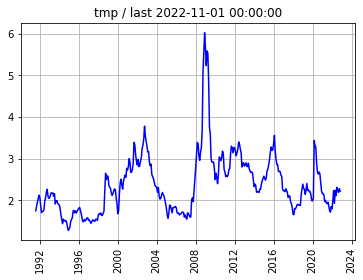

In [16]:
#  The y-scale is in (basis points)/100
plotmonth(baa)

In [17]:
#  See section on Profiling:
baamad = fe.madmen(baa[start:])

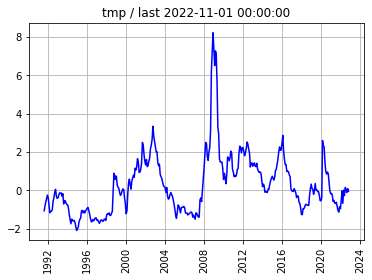

In [18]:
#  Here the y-scale uses MAD:
plotmonth(baamad)

In [19]:
#  Take the mean of all profiles:
madness = fe.todf((mortmad + baamad) / 2)

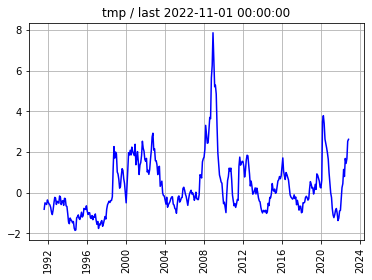

In [20]:
#  Here the y-scale uses averaged MAD:
plotmonth(madness)

In [21]:
#  Most RECENT values of UNIFIED CREDIT PROFILE, daily madness:
fe.tail(madness)

,Y
T,
2022-11-15,2.984413
2022-11-16,3.113208
2022-11-17,2.623462
2022-11-18,2.404020
2022-11-21,2.278917
2022-11-22,2.385972
2022-11-23,2.402379


In [22]:
dfappendix = fe.creditprof()

In [23]:
#  Access pandas, and test for equality, up to 4 decimal places:
fe.pd.testing.assert_frame_equal(madness, dfappendix, check_less_precise=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The 'check_less_precise' keyword in testing.assert_*_equal is deprecated and will be removed in a future version. You can stop passing 'check_less_precise' to silence this warning.
  
